In [10]:
import pandas as pd

## Groupby: aggrégation

Groupby permet d'aggréger des données ayant des caractéristes communes. Prenons par exemple un DataFrame regroupant des info sur les victimes du Titanic.

In [34]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


On veut séparer les info pour les hommes et les femmes. On pourrait faire ça "à la main" avec une indexation

In [40]:
df.loc[df.sex == "male", "class"].value_counts()

Third     347
First     122
Second    108
Name: class, dtype: int64

In [41]:
df.loc[df.sex == "female", "class"].value_counts()

Third     144
First      94
Second     76
Name: class, dtype: int64

Mais il est possible de faire l'opération d'un coup avec `groupby`.

In [46]:
df.groupby("sex")["class"].value_counts()

sex     class 
female  Third     144
        First      94
        Second     76
male    Third     347
        First     122
        Second    108
Name: class, dtype: int64

On fourni la colonne indiquant la catégorie permettant de regrouper les données, puis une fonction d'aggrégat.

In [47]:
df.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

Il est possible d'itérer sur le `groupby`, ce qui renverra le nom des catégories et le subset du dataframe correspondant.

In [49]:
for kind, subdf in df.groupby("who"):
    print(kind)
    print(subdf[["age", "survived"]])

child
       age  survived
7     2.00         0
9    14.00         1
10    4.00         1
14   14.00         0
16    2.00         0
..     ...       ...
831   0.83         1
850   4.00         0
852   9.00         0
869   4.00         1
875  15.00         1

[83 rows x 2 columns]
man
      age  survived
0    22.0         0
4    35.0         0
5     NaN         0
6    54.0         0
12   20.0         0
..    ...       ...
883  28.0         0
884  25.0         0
886  27.0         0
889  26.0         1
890  32.0         0

[537 rows x 2 columns]
woman
      age  survived
1    38.0         1
2    26.0         1
3    35.0         1
8    27.0         1
11   58.0         1
..    ...       ...
880  25.0         1
882  22.0         0
885  39.0         0
887  19.0         1
888   NaN         0

[271 rows x 2 columns]


Il est aussi possible de créer des intervals de valeurs continues et de faire un aggrégat à partir de ces intervals :

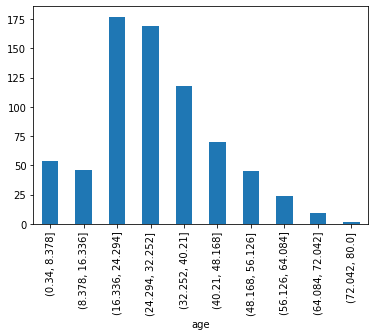

In [58]:
bins = pd.cut(df.age, 10) # on crée 10 intervals sur l'age
count_by_age = df.age.groupby(bins).count() # on comptabilise les catégories d'ages
count_by_age.plot(kind="bar")

Si ce n'est qu'à but d'affichage, il est possible d'utiliser directement un histogramme :

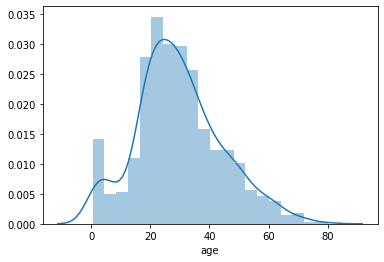

In [62]:
sns.distplot(df.age.dropna())

**La méthode groupby est complexe, et accepte aussi de prendre une collection quelconque pour faire la séparation du DataFrame. Elle permet de d'aggréger, de filtrer, d'appliquer des fonctions à une sous-partie des DataFrames.**

Pour plus d'info, il est possible de référer au [guide utilisateur pandas correspondant](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).